In [1]:
from stitching import Stitch,merge
import glob
import cv2
import random
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images=glob.glob("*.jpg")

In [3]:
random.shuffle(images)

In [4]:
stit=Stitch(images,MIN=5,tresh=0.6)

In [11]:
a,b=stit.images[0],stit.images[1]

In [12]:
k1,d1=a[0],a[1]
k2,d2=b[0],b[1]

bf=cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches=bf.knnMatch(d1,d2,k=2)
good=[]

for m,n in matches:
    if m.distance <stit.treshold*n.distance:
        good.append(m)
       


In [17]:
k1[good[0].trainIdx].pt

(1178.0, 2029.0)

In [5]:
res=stit.stitching()

number of corresponding point:  904
[[ 1.00069904e+00 -1.75638660e-05 -6.18236696e+02]
 [ 3.96369657e-04  1.00067736e+00 -2.53275509e+01]
 [ 7.25851136e-07 -1.39349851e-07  1.00000000e+00]]
H good
number of corresponding point:  514
[[ 9.98580635e-01 -1.90968844e-04  1.43897343e+03]
 [-9.78070328e-04  9.99416311e-01  4.05455023e+01]
 [-5.43074758e-07 -1.22233434e-07  1.00000000e+00]]
H good
number of corresponding point:  1086
[[ 9.99375842e-01 -1.03675080e-04  2.08154393e+03]
 [-8.03009714e-04  9.99649158e-01  9.83142827e-02]
 [-5.07677589e-07 -1.28399101e-07  1.00000000e+00]]
H good
number of time we evaluated H:  3


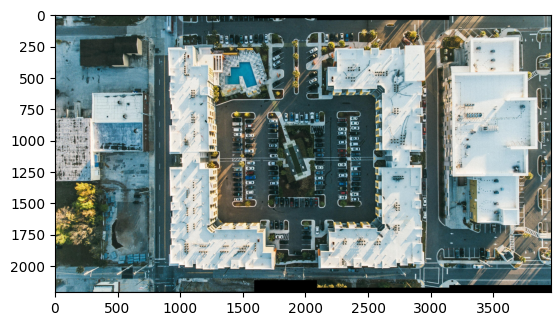

In [6]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB ))
plt.show()

In [12]:
images=glob.glob("data\*.jpg")

In [13]:
iimages=sorted(images, key=lambda s:int(re.search(r'\d+',s).group()))

In [18]:
stit=Stitch(iimages[190:196],MIN=5,tresh=0.6)

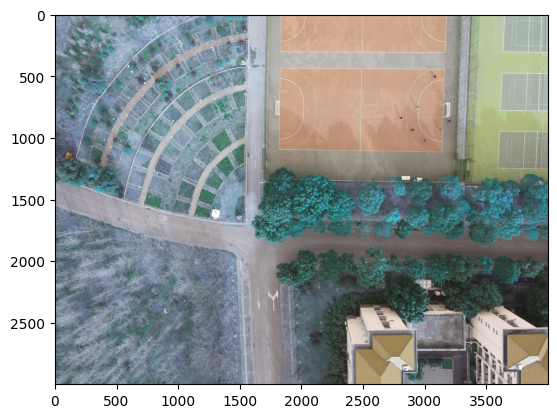

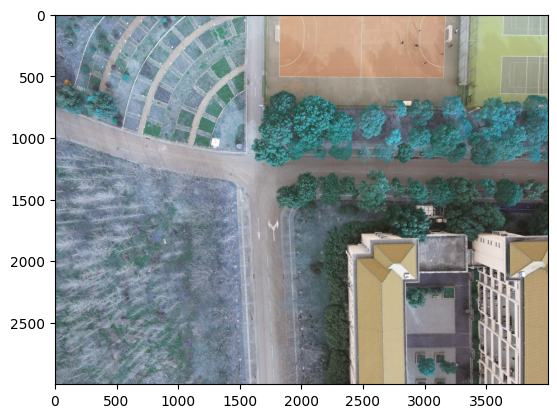

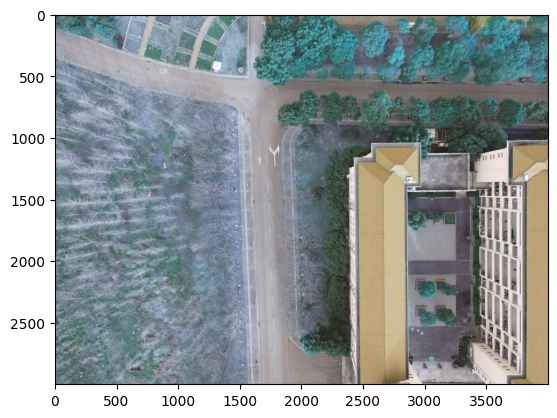

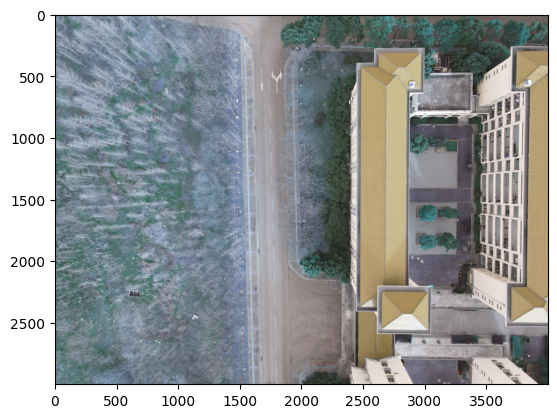

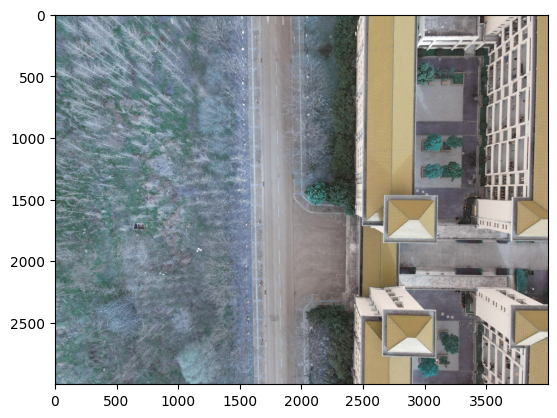

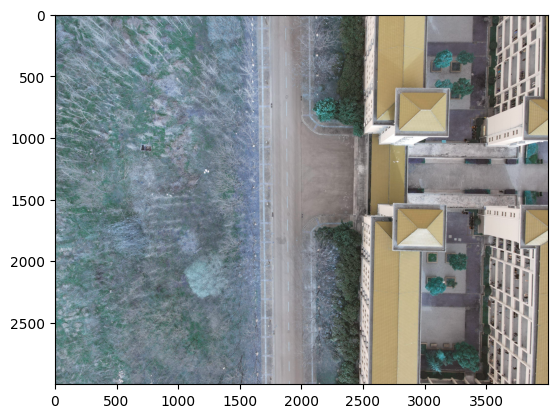

In [19]:
for i in stit.images:
    plt.imshow(i[2])
    plt.show()

In [15]:
res=stit.stitching()

number of corresponding point:  31
H good
number of corresponding point:  31
H good
number of corresponding point:  12
H good
number of corresponding point:  9
H good
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null
H null


KeyboardInterrupt: 

In [53]:
H1=stit.homography(stit.images[0],stit.images[1])

number of corresponding point:  76


In [54]:
H2=stit.homography(stit.images[2],stit.images[3])

number of corresponding point:  50


In [59]:
im1=merge(stit.images[0],stit.images[1],H1)

In [60]:
im2=merge(stit.images[2],stit.images[3],H2)

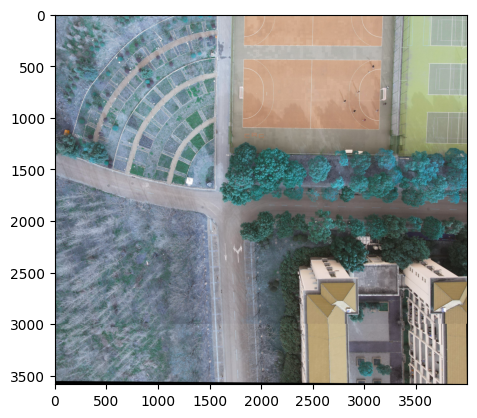

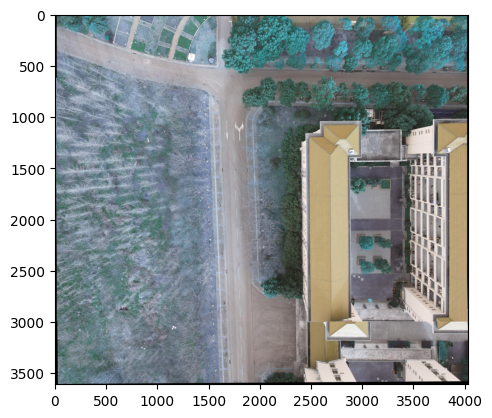

In [61]:
plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

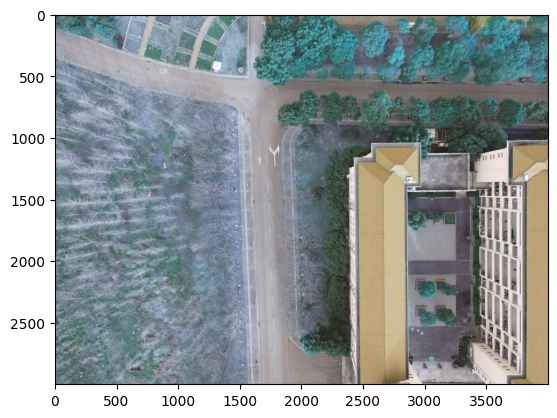

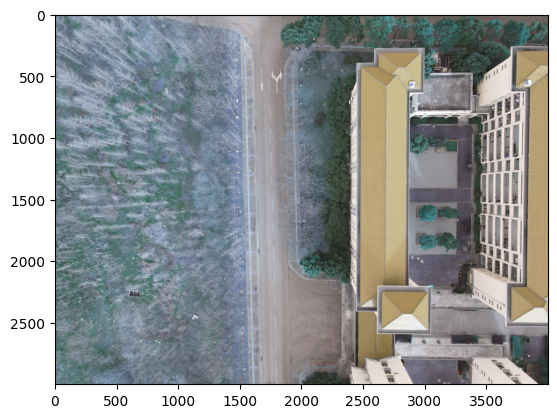

In [62]:
plt.imshow(stit.images[2][2])
plt.show()
plt.imshow(stit.images[3][2])
plt.show()

In [63]:
k1,d1=stit.orb.detectAndCompute(im1,None)
k2,d2=stit.orb.detectAndCompute(im2,None)

In [65]:
H=stit.homography((k1,d1,im1),(k2,d2,im2))
im=merge((k1,d1,im1),(k2,d2,im2),H)

number of corresponding point:  27


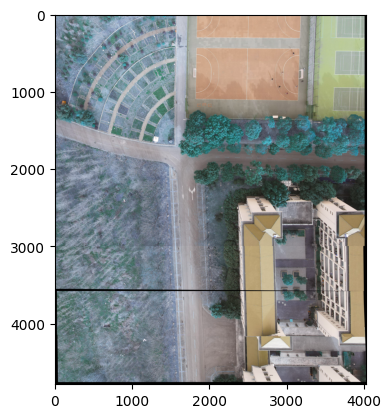

In [66]:
plt.imshow(im)
plt.show()

In [ ]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB ))
plt.show()

In [39]:
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=False)
knn_matches= bf.knnMatch(stit.images[0][1],np.vstack([k[1] for k in stit.images[1:]]),k=6)

In [47]:
knn_matches[0][5].distance

59.0